In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from import_augmentation_function import normalization_fun

base_dir = r'C:\Users\roumba\Documents\Software\deep-events'
data_path = base_dir+ r'\testing_data'  
folder_name = r'\Modelsref_f8_c9_b16'

model_type= r'\MODELS_both_iSIM_fl'
MODELS, cell, microscope, fl_bf= model_type.split('_')

model_path = base_dir + folder_name + model_type

data=data_path+r'\both_iSIM_fl_data_val.tiff'
data_test = tifffile.imread(data)
gauss=data_path+r'\both_iSIM_fl_data_gauss_val.tiff'
gauss_test = tifffile.imread(gauss)
out=data_path+r'\both_iSIM_fl_model_output.tif'
model_out = tifffile.imread(out)
model_out_n= normalization_fun(model_out,0.1)

Normalized confusion matrix
[[0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.2 0.2 0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]
 [0.  0.  0.  ... 0.  0.  0. ]]


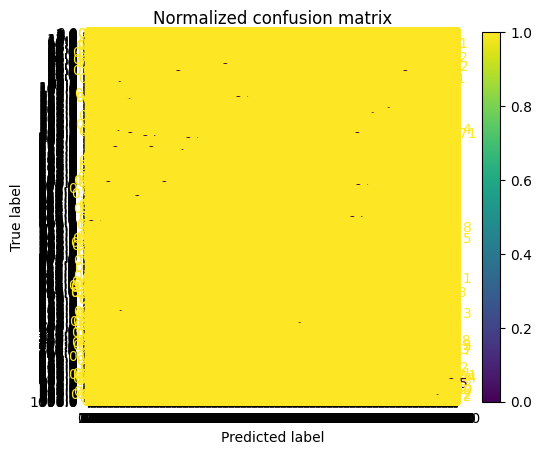

In [11]:
from sklearn.utils.multiclass import type_of_target
from sklearn.metrics import ConfusionMatrixDisplay
predicted=[]
actual=[]

for i in range(0,model_out_n.shape[0],1):
    for j in range(0,model_out_n.shape[1],1):
        for k in range(0,model_out_n.shape[2],1):
            if model_out_n[i,j,k] != 0 and gauss_test[i,j,k] != 0 :
                predicted.append(model_out_n[i,j,k])
                actual.append(gauss_test[i,j,k])
predicted=np.array(predicted)
predicted=predicted*1000
predicted[predicted < 1] = 0 
actual=np.array(actual)
actual=actual*1000
actual[actual < 1] = 0 
for i in range(0,predicted.size,1):
    predicted[i]=int(predicted[i])
    actual[i]=int(actual[i])


#for title, normalize in titles_options:
title= "Normalized confusion matrix"
disp = ConfusionMatrixDisplay.from_predictions(actual,predicted,normalize="true")
disp.ax_.set_title(title)
print(title)
print(disp.confusion_matrix)

plt.show()